In [2]:
# importing the necessary modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import close as clc
import seaborn as sns
# Importing the data from the .xlsx as a data frame using the pandas module
df = pd.read_csv("PGL_data.csv", low_memory = False)

#Removing the unecessary columns by name
df.drop(columns = {'Column21', 'Column22', 'Column23', 'Column24'}, inplace=True)
col = df.columns.tolist()

print('index  |        b             column name     |    number of entries')
print('-------------------------------------------------------------------------------------')
for heading in col:
    print("%3.0f    |    %30s   |    %8.0f" % (col.index(heading), heading, len(df[heading].loc[df[heading].notna()])))
print('-------------------------------------------------------------------------------------')

index  |        b             column name     |    number of entries
-------------------------------------------------------------------------------------
  0    |                      Account Name   |      187864
  1    |          Establishment Aplicor ID   |      187858
  2    |                Contact Aplicor ID   |      187864
  3    |                             Stage   |      187514
  4    |                Opportunity Source   |       87182
  5    |                       Loss Reason   |       51912
  6    |                           Product   |      183022
  7    |                            Course   |       59973
  8    |                 Booking Reference   |      187864
  9    |             Centre(s) of Interest   |       63827
 10    |                Accommodation Type   |       21327
 11    |                      Arrival Date   |      165044
 12    |                      Booking Date   |      139149
 13    |                         Age Range   |       59343
 14    |           

In [30]:
top_establishments = df[col[1]].loc[df[col[1]].notna()].value_counts().head(5000).index.tolist()
lower_establishments = df[col[1]].loc[df[col[1]].notna()].value_counts().tail(5000).index.tolist()

In [34]:
def mode_bar_bands(column,order):
    upper_schools = df.loc[df[col[1]].isin(top_establishments)]
    upper_mode= upper_schools.groupby([col[1]])[column].agg(pd.Series.mode).explode()
    upper_mode = upper_mode[(upper_mode.str.len() > 0)]
    
    lower_schools = df.loc[df[col[1]].isin(lower_establishments)]
    lower_mode = lower_schools.groupby([col[1]])[column].agg(pd.Series.mode).explode()
    lower_mode = lower_mode[lower_mode.str.len() > 0]
    # plt.style.use('seaborn-pastel')
    sns.set_theme()
    d = pd.DataFrame({'upper_mode' : upper_mode.value_counts(normalize=True).mul(100), 'lower_mode' : lower_mode.value_counts(normalize=True).mul(100)})
    if order != 0:
        d.sort_index().loc[order].plot.bar()
    else:
        d.sort_index().plot.bar()
    plt.legend()
    plt.title('Chart to show the mode of each school for ' + column)
    plt.xlabel(column)
    plt.ylabel('Percentage of of schools [%]')
    
    # print("Number of top schools used that have values = ", len(upper_mode))
    # print("Number of bottom schools used that have values = ", len(lower_mode))
    return d

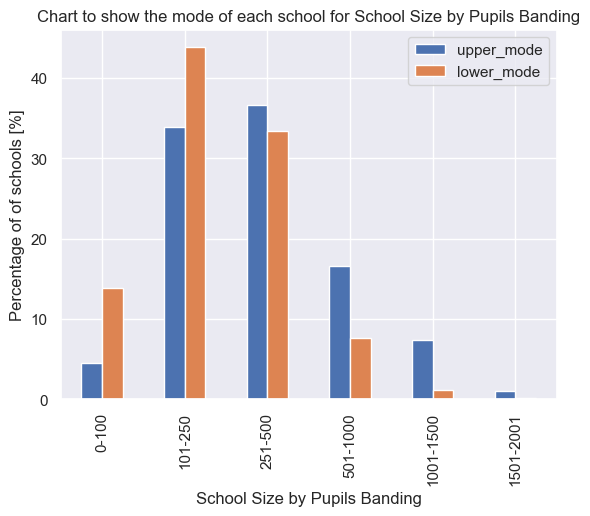

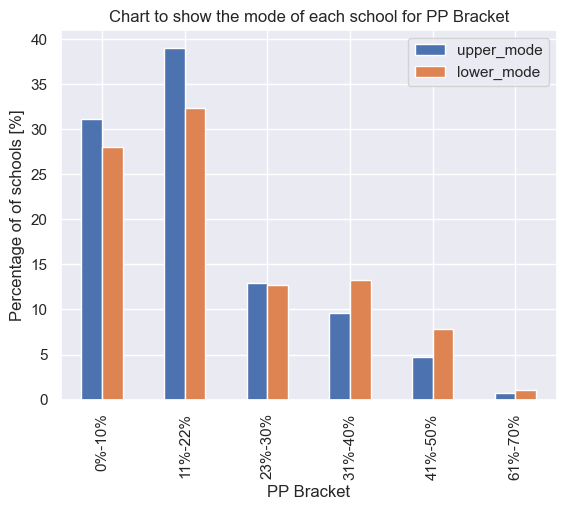

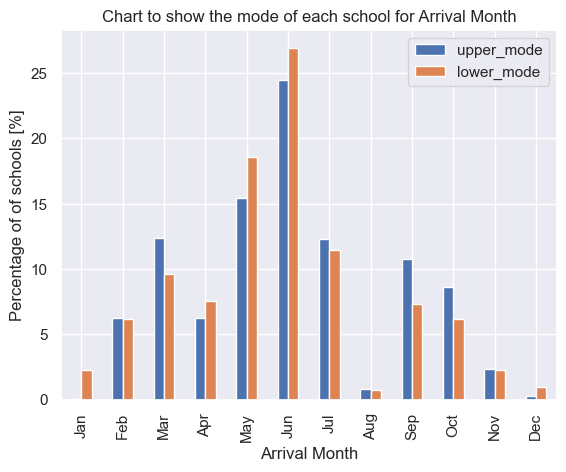

In [56]:
# School size banding
order = ['0-100','101-250','251-500','501-1000','1001-1500','1501-2001']
school_size_banding = mode_bar_bands(col[44],order)

# Government funding
order_pp = ['0%-10%','11%-22%','23%-30%','31%-40%','41%-50%','61%-70%']
pp_banding = mode_bar_bands(col[43], order_pp)

# month of arrival
order_months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly = mode_bar_bands(col[31],order_months)

# plt.close('all')

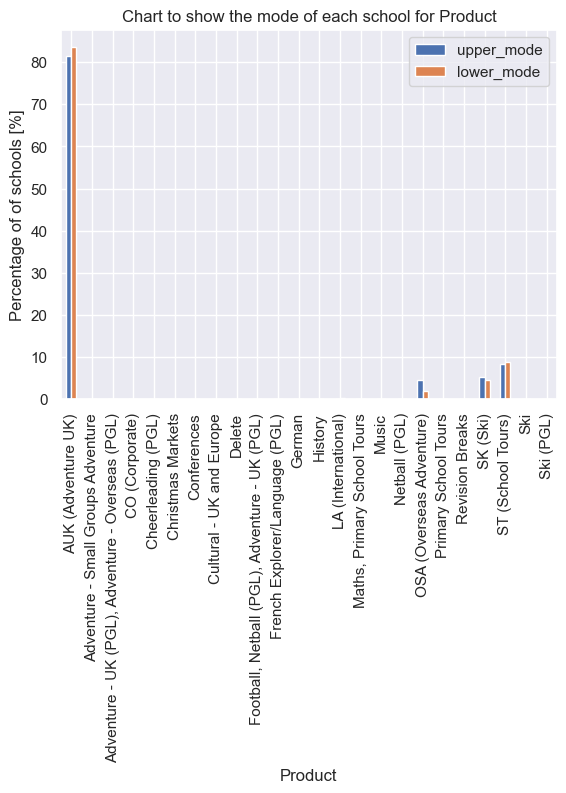

In [57]:
monthly = mode_bar_bands(col[6],0)

In [54]:
upper_schools = df.loc[df[col[1]].isin(top_establishments)]
upper_schools[col[24]].value_counts()

 0.00       100444
-12.00         547
-8.00          289
-10.00         255
-20.00         157
             ...  
-1315.00         1
-668.00          1
-31.15           1
-397.00          1
-132.43          1
Name: Discount, Length: 5207, dtype: int64